In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)

inputs = keras.Input(shape=(218, 178, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory
new_base_dir = "dataset"
train_dataset = image_dataset_from_directory(
    new_base_dir + "/train",
    image_size=(218, 178),
    batch_size=64)
validation_dataset = image_dataset_from_directory(
    new_base_dir + "/validation",
    image_size=(218, 178),
    batch_size=64)
test_dataset = image_dataset_from_directory(
    new_base_dir + "/test",
    image_size=(218, 178),
    batch_size=64)

Found 1536 files belonging to 2 classes.
Found 242 files belonging to 2 classes.
Found 190 files belonging to 2 classes.


In [7]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)

Epoch 1/30
24/24 [==============================] - 7s 65ms/step - loss: 1.2201 - accuracy: 0.6309 - val_loss: 0.4638 - val_accuracy: 0.8388
Epoch 2/30
24/24 [==============================] - 1s 51ms/step - loss: 0.4652 - accuracy: 0.7845 - val_loss: 0.2244 - val_accuracy: 0.9339
Epoch 3/30
24/24 [==============================] - 1s 52ms/step - loss: 0.4036 - accuracy: 0.8424 - val_loss: 0.4255 - val_accuracy: 0.7810
Epoch 4/30
24/24 [==============================] - 1s 51ms/step - loss: 0.3483 - accuracy: 0.8574 - val_loss: 0.2019 - val_accuracy: 0.9215
Epoch 5/30
24/24 [==============================] - 1s 53ms/step - loss: 0.2745 - accuracy: 0.8822 - val_loss: 0.1721 - val_accuracy: 0.9380
Epoch 6/30
24/24 [==============================] - 1s 54ms/step - loss: 0.2355 - accuracy: 0.9108 - val_loss: 0.3930 - val_accuracy: 0.8306
Epoch 7/30
24/24 [==============================] - 1s 49ms/step - loss: 0.2010 - accuracy: 0.9232 - val_loss: 0.1372 - val_accuracy: 0.9421
Epoch 8/30
24

KeyboardInterrupt: 

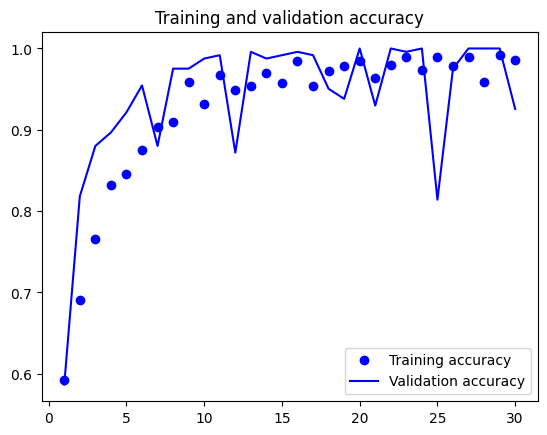

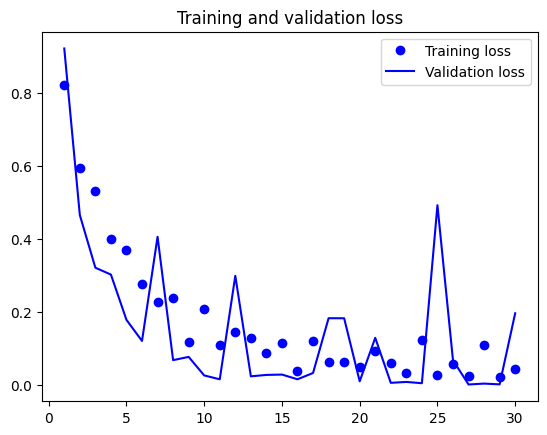

In [6]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [7]:

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

3/3 [==============================] - 0s 102ms/step - loss: 0.1991 - accuracy: 0.9421
Test accuracy: 0.942


In [8]:
model.save("Peters_face_v1.h5")